# Detección de manos

MediaPipe incluye un modelo para la predicción del movimiento y articulación de las manos. Este modelo puede ser utilizado para implementar distintos niveles de interacción a través de una cámara.

El modelo de inferencia detecta 21 marcadores de la mano a través de un pipelines con múltiples modelos trabajando de manera conjunta.
Primero se cuenta con un detector de palmas sobre toda la imagen, posteriormente, un modelo de predicción de marcadores procesa la región con la palma. La estrategia es similar a la detección de marcadores faciales observada anteriormente.

 - **Detección de palmas**: se basa en una red de detección SSD optimizada. El modelo es capaz de detectar palmas incluso en distintos niveles de oclusión.
 - **Detección de marcadores**: Se utiliza un modelo de regresión que predice la localización de 21 marcadores de una mano. Se utilizan los siguientes marcadores:

 ![marcadores](hand_landmarks.png)

In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 8]    # incrementar tamaño de plots

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [2]:
def display_color_row(*imgs):
    for i, img in enumerate(imgs):
        print(type(img), img.dtype, img[0,0])
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img)
        plt.title(f"{i}")
        plt.xticks([])
        plt.yticks([])

<class 'numpy.ndarray'> uint8 [12  9 16]
<class 'numpy.ndarray'> uint8 [12  9 16]


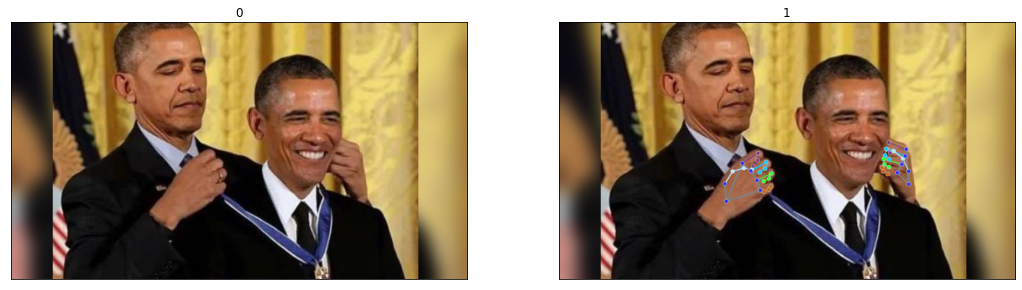

In [6]:
img = cv2.cvtColor(cv2.imread("../object_detection/obama2.jpg"), cv2.COLOR_BGR2RGB)
img = cv2.flip(img, 1)

with mp_hands.Hands(static_image_mode=True, max_num_hands=2) as hands:
    results = hands.process(img)

    out = img.copy()

    height, width, _ = img.shape
    
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
          out,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style()
        )

display_color_row(img, out)